#### Python для анализа данных (социальные науки)

## Контрольная работа по Pandas

Контрольная работа проводится после блока по Pandas

*Автор: Татьяна Рогович, НИУ ВШЭ*

**Списывание и использование телефонов** 

Первое предупреждение, сделанное ассистентом или преподавателем: - 1 балл к вашей оценке.

Второе предупреждение: работа аннулируется без права переписывания.

Задания с подозрением на списанные аннулируются всем студентам. Если кто-то признается, что именно он списал работу, то аннулированная оценка остается только у списавшего.

Если больше четырех заданий совпадают у двух студентов, аннулириуется вся работа.

**Оформление, стиль, эффективность (штраф до 1 балла)**

За каждый тип повторяющейся стилистической ошибки снимается 0.25 балла. Повторяющейся считаем ошибку, допущенную минимум 2 раза.

0.25 балла снимается за каждые 4 не систематические ошибки (4 разных ошибки, допущенных по одному разу.)

Так же из этого балла могут сниматься штрафы 0.25 за использование ненужных функций (мы не оцениваем здесь эффективность решения, но смотрим на такие вещи, как, например, перевод строкового вода в строку - лишняя ненужная операция). Мы делаем вывод, что вы не до конца понимаете, как работает код.

Все задачи должны принимать значения на ввод (решение для частного случая там, где в условии говорится, что подается на ввод, будет считаться неполным). Неполные решения могут быть зачтены с оценкой равной доле от полного возможного балла за этот пункт.

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [18]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1. (0.5 балла)__

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов (но мы должны видеть как вы это делали). 

Для тех переменных, в которых есть пропуске, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [37]:
print(f'В переменной Pregnacies \
{data["Pregnancies"].isnull().shape[0]} \
пропущенных значений')
print(f'В переменной Glucose \
{data["Glucose"].isnull().shape[0]} \
пропущенных значений')
print(f'В переменной BloodPressure \
{data["BloodPressure"].isnull().shape[0]} \
пропущенных значений')
print(f'В переменной SkinThickness \
{data["SkinThickness"].isnull().shape[0]} \
пропущенных значений')
print(f'В переменной Insulin \
{data["Insulin"].isnull().shape[0]} \
пропущенных значений')
print(f'В переменной BMI \
{data["BMI"].isnull().shape[0]} \
пропущенных значений')
print(f'В переменной DiabetesPedigreeFunction \
{data["DiabetesPedigreeFunction"].isnull().shape[0]} \
пропущенных значений')
print(f'В переменной Age \
{data["Age"].isnull().shape[0]} \
пропущенных значений')
print(f'В переменной Class \
{data["Class"].isnull().shape[0]} \
пропущенных значений')

В переменной Pregnacies 768 пропущенных значений
В переменной Glucose 768 пропущенных значений
В переменной BloodPressure 768 пропущенных значений
В переменной SkinThickness 768 пропущенных значений
В переменной Insulin 768 пропущенных значений
В переменной BMI 768 пропущенных значений
В переменной DiabetesPedigreeFunction 768 пропущенных значений
В переменной Age 768 пропущенных значений
В переменной Class 768 пропущенных значений


__Задание 2. (1 балл)__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [40]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].mean())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].median())

data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


__Задание 3. (0.5 балла)__

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [41]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,763.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4. (0.5 балла)__

У скольких женщин старше 50 лет обнаружен диабет?

In [164]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data[(data.Age > 50) & (data.Class == 1)].shape[0]  # старше 50 с диабетом

38

__Задание 5. (0.5 балла)__

Найдите трех женщин с наибольшими числом беременностей.

In [42]:
data['Pregnancies'].nlargest(3)

159    17
88     15
298    14
Name: Pregnancies, dtype: int64

__Задание 6. (0.5 балла)__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [43]:
data[(data.Age < 30) & (data.Pregnancies > 3)].shape[0]

66

__Задание 7. (1 балл)__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [46]:
print(f'{data[(data.BloodPressure < 89) & (data.BloodPressure > 80)].shape[0] / data.shape[0] * 100}%')

13.671875%


__Задание 8. (1 балл)__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [47]:
BMI_mean = data.BloodPressure.mean()
data[(data.BMI >= 30) & (data.BloodPressure > BMI_mean)].shape[0]

251

__Задание 9. (1 балл)__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [48]:
data.groupby('Class')['Glucose'].mean()

Class
0    110.643863
1    142.319549
Name: Glucose, dtype: float64

In [49]:
data.groupby('Class')['BloodPressure'].mean()

Class
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

In [50]:
data.groupby('Class')['Insulin'].mean()

Class
0    127.792000
1    164.701493
Name: Insulin, dtype: float64

__Задание 10. (0.5 балла)__

Постройте круговую диаграмму для признака __Class__.

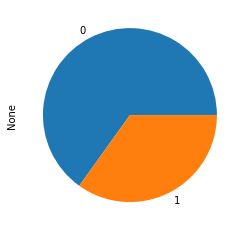

In [51]:
data.groupby('Class').size().plot(kind = 'pie')

__Задание 11. (0.5 балла + 0.5 балла)__

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

*Доп. баллы*
Постройте нормальное распределение поверх графика.

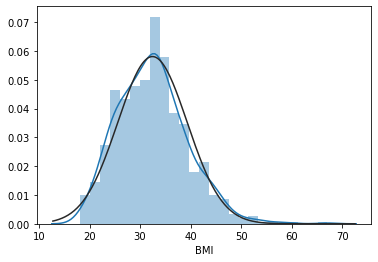

In [52]:
sns.distplot(data.BMI.dropna(), fit = norm)

__Задание 12. (1 балл)__

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

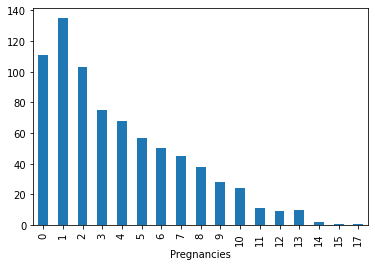

In [53]:
data.groupby('Pregnancies')['Class'].size().plot(kind = 'bar')

__Задание 13. (0.5 балла)__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [55]:
data['wasPregnant'] = data['Pregnancies'].apply(lambda x: 0 if x==0 else 1)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1,1
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1,0
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0,1
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1,1
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0,1
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1,1
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1,1


__Задание 14. (0.5 балла)__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [88]:
temp = data.groupby('wasPregnant')['Class'].mean()
print(f'Процент женщин которые \
не были беременны - {temp[0]*100}\n\
Процент женщин которые \
были беременны - {temp[1]*100}')

Процент женщин которые не были беременны - 34.234234234234236
Процент женщин которые были беременны - 35.0076103500761


__Задание 15. (бонусное:  1 балл)__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 
    
Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [61]:
def bmi_categories(a: data['BMI']):
    if a <= 18.5:
        return 'Underweight'
    elif (a > 18.5) & (a < 24.9):
        return 'Normal Weight'
    elif (a >= 25) & (a <= 30):
        return 'Overweight'
    elif a >= 30:
        return 'Obesity'
    
data['bodyType'] = data.BMI.apply(bmi_categories)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,Normal Weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity


__Задание 16. (бонусное:  0.5 балла)__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [100]:
data[(data.BloodPressure < 89) \
                & (data.BloodPressure > 80) \
                & (data.bodyType == 'Normal Weight')]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
28,13,145.0,82.0,19.0,110.0,22.2,0.245,57,0,1,Normal Weight
94,2,142.0,82.0,18.0,64.0,24.7,0.761,21,0,1,Normal Weight
676,9,156.0,86.0,29.0,125.0,24.8,0.230,53,1,1,Normal Weight
728,2,175.0,88.0,29.0,125.0,22.9,0.326,22,0,1,Normal Weight
